# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()

,arrival_delay,departure_delay,day_of_week,scheduled_dep_time,distance,month
count,98710.000000,99123.000000,100635.000000,100635.000000,100635.000000,100635.000000
mean,8.535498,15.113283,4.001053,1347.374909,890.548060,6.694212
std,65.515171,63.183139,2.015506,482.392957,597.595095,3.273155
min,-72.000000,-36.000000,1.000000,107.000000,36.000000,1.000000
25%,-18.000000,-6.000000,2.000000,909.000000,453.000000,4.000000
50%,-8.000000,-2.000000,4.000000,1345.000000,678.000000,7.000000
75%,11.000000,10.000000,6.000000,1832.000000,1013.000000,9.000000
max,2189.000000,2204.000000,7.000000,2359.000000,2521.000000,12.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.nanmean( x )
    x1     = np.nanmedian( x )
    x2 = stats.mode(x, nan_policy='omit').mode  # mode, ignoring NaN
    return x0, x1, x2


def dispersion(x, print_output=True): # ignore NaN values
    y0 = np.nanstd(x)              # standard deviation
    y1 = np.nanmin(x)              # minimum
    y2 = np.nanmax(x)              # maximum
    y3 = y2 - y1                   # range
    y4 = np.nanpercentile(x, 25)   # 25th percentile
    y5 = np.nanpercentile(x, 75)   # 75th percentile
    y6 = y5 - y4                   # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    # Select only numeric columns to avoid TypeError on categorical data (airline, destination)
    df_numeric = df.select_dtypes(include=['number'])
    df_central = df_numeric.apply(lambda x: central(x), axis=0)
    round_dict = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,arrival_delay,departure_delay,day_of_week,scheduled_dep_time,distance,month
mean,8.535498,15.113283,4.001053,1347.374909,890.54806,6.694212
median,-8.000000,-2.000000,4.000000,1345.000000,678.00000,7.000000
mode,-15.000000,-5.000000,1.000000,600.000000,666.00000,8.000000


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'arrival_delay': 2, 'departure_delay': 2, 'day_of_week': 2, 'scheduled_dep_time': 0, 'distance': 1, 'month': 2} # no decimals for time
    df_numeric            = df.select_dtypes(include=['number']) # only numeric columns
    df_dispersion         = df_numeric.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,arrival_delay,departure_delay,day_of_week,scheduled_dep_time,distance,month
st.dev.,65.51,63.18,2.02,482.0,597.6,3.27
min,-72.00,-36.00,1.00,107.0,36.0,1.00
max,2189.00,2204.00,7.00,2359.0,2521.0,12.00
range,2261.00,2240.00,6.00,2252.0,2485.0,11.00
25th,-18.00,-6.00,2.00,909.0,453.0,4.00
75th,11.00,10.00,6.00,1832.0,1013.0,9.00
IQR,29.00,16.00,4.00,923.0,560.0,5.00


Let's save the variables in easier-to-use variable names:

In [6]:
arr_delay = df['arrival_delay']
dep_delay = df['departure_delay']
day       = df['day_of_week']
sched     = df['scheduled_dep_time']
airline   = df['airline']
dest      = df['destination']
dist      = df['distance']
month     = df['month']

Let's create scatterplots for the DV (arrival delay) vs. each of the numeric IVs (departure delay, distance, scheduled departure time):

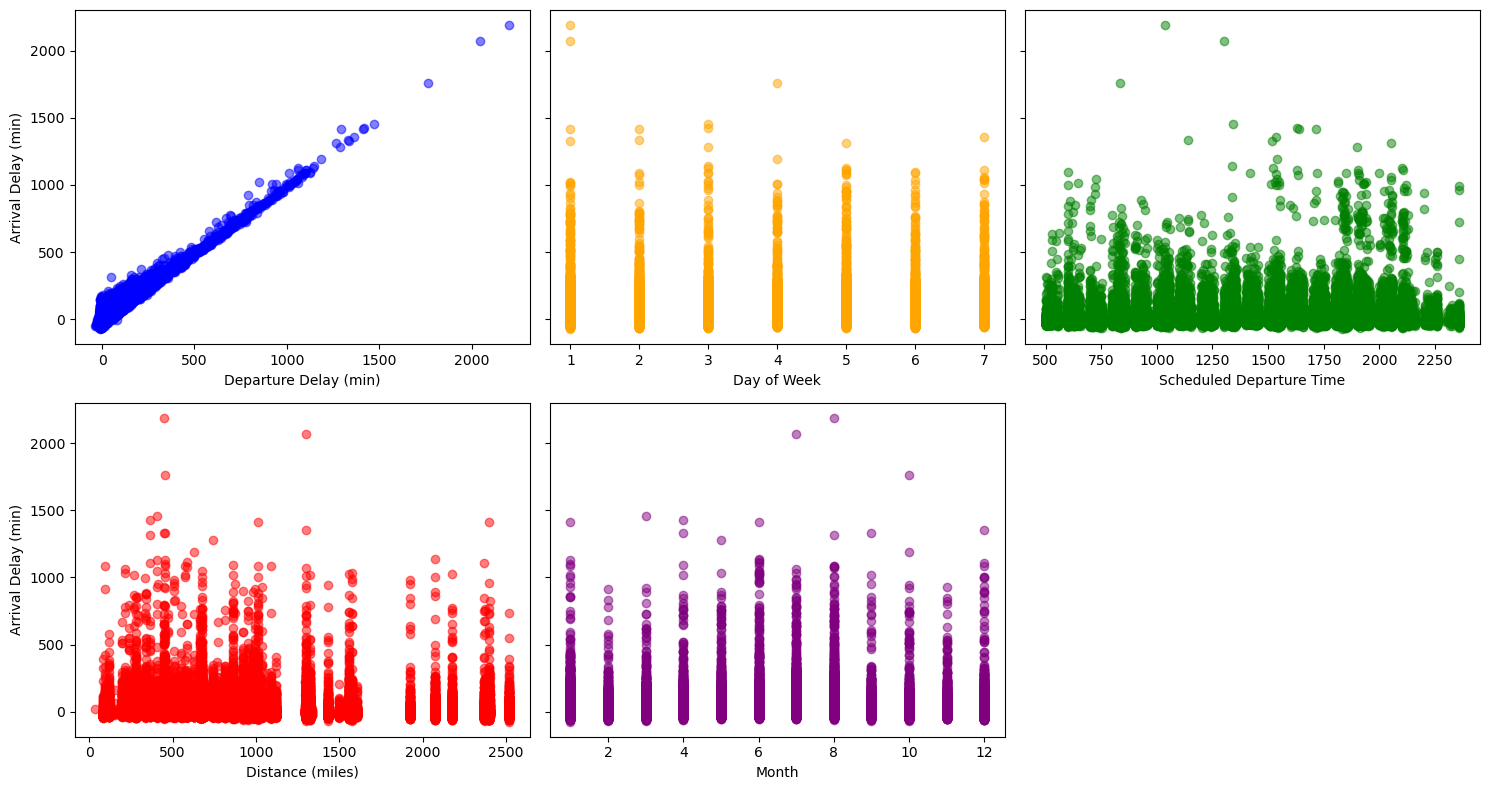

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
axs = axs.flatten()

axs[0].scatter(dep_delay, arr_delay, alpha=0.5, color='b')
axs[1].scatter(day, arr_delay, alpha=0.5, color='orange')
axs[2].scatter(sched, arr_delay, alpha=0.5, color='g')
axs[3].scatter(dist, arr_delay, alpha=0.5, color='r')
axs[4].scatter(month, arr_delay, alpha=0.5, color='purple')

xlabels = ['Departure Delay (min)', 'Day of Week', 'Scheduled Departure Time', 
           'Distance (miles)', 'Month']
[ax.set_xlabel(s) for ax, s in zip(axs[:5], xlabels)]
axs[0].set_ylabel('Arrival Delay (min)')
axs[3].set_ylabel('Arrival Delay (min)')
[ax.set_yticklabels([]) for ax in [axs[1], axs[2], axs[4]]]

# Hide the 6th subplot
axs[5].axis('off')

plt.show()

The density xtick values are difficult to reach so let's make them easier to read:

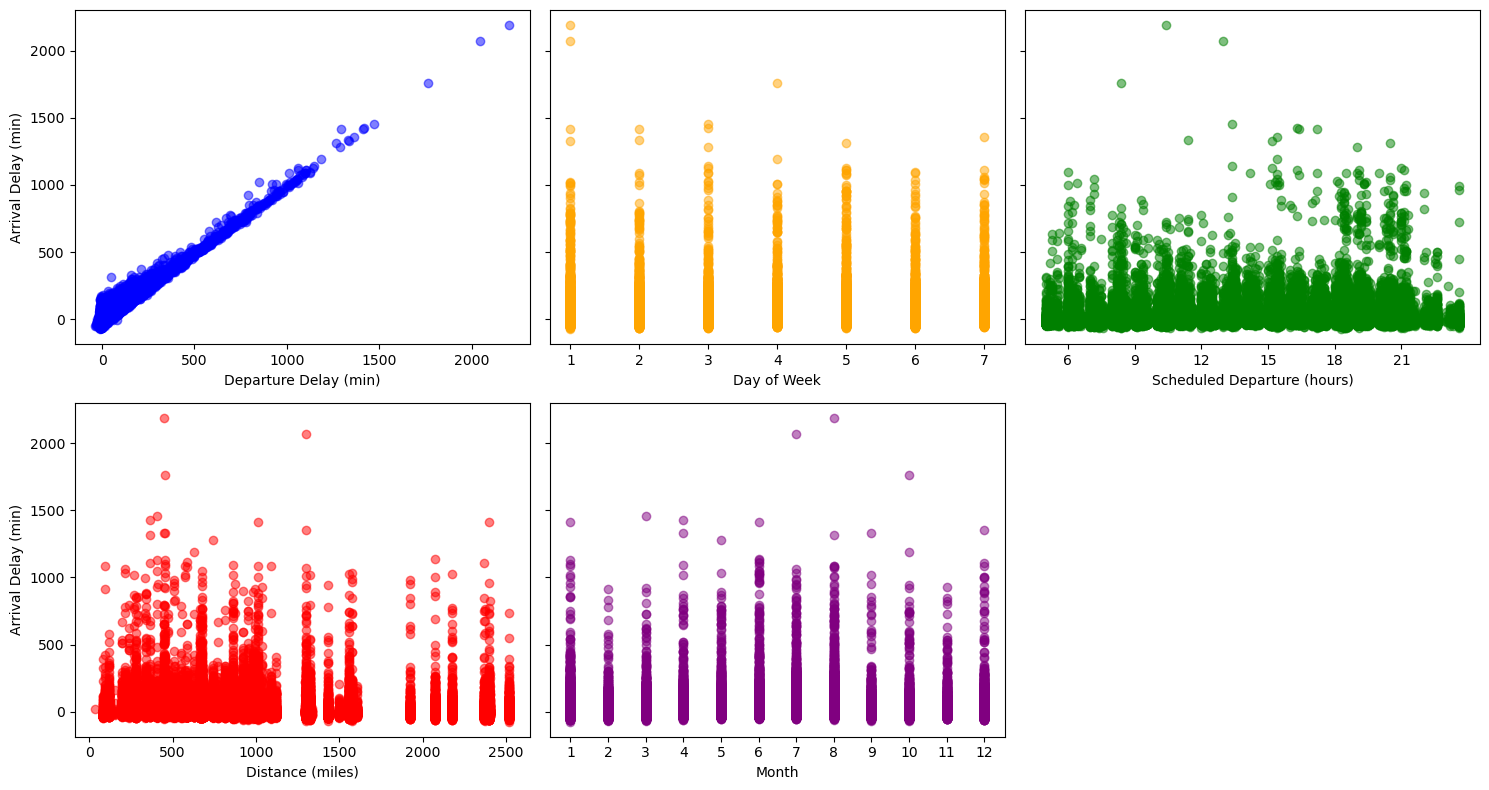

In [8]:
sched_hours = np.around(sched / 100, 1)  # convert scheduled time to hours (e.g., 1345 -> 13.45)

fig, axs = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
axs = axs.flatten()

axs[0].scatter(dep_delay, arr_delay, alpha=0.5, color='b')
axs[1].scatter(day, arr_delay, alpha=0.5, color='orange')
axs[2].scatter(sched_hours, arr_delay, alpha=0.5, color='g')
axs[3].scatter(dist, arr_delay, alpha=0.5, color='r')
axs[4].scatter(month, arr_delay, alpha=0.5, color='purple')

xlabels = ['Departure Delay (min)', 'Day of Week', 'Scheduled Departure (hours)', 
           'Distance (miles)', 'Month']
[ax.set_xlabel(s) for ax, s in zip(axs[:5], xlabels)]

axs[2].set_xticks([6, 9, 12, 15, 18, 21])  # set time markers (6am, 9am, noon, 3pm, 6pm, 9pm)
axs[1].set_xticks([1, 2, 3, 4, 5, 6, 7])  # days of the week
axs[4].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])  # months

axs[0].set_ylabel('Arrival Delay (min)')
axs[3].set_ylabel('Arrival Delay (min)')
[ax.set_yticklabels([]) for ax in [axs[1], axs[2], axs[4]]]

# Hide the 6th subplot
axs[5].axis('off')

plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [9]:
def corrcoeff(x, y):
    # Remove NaN values for correlation calculation
    mask = ~np.isnan(x) & ~np.isnan(y)
    r = np.corrcoef(x[mask], y[mask])[0, 1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    # Remove NaN values for regression line
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean, y_clean = x[mask], y[mask]
    a, b = np.polyfit(x_clean, y_clean, deg=1)
    x0, x1 = min(x_clean), max(x_clean)
    y0, y1 = a*x0 + b, a*x1 + b
    ax.plot([x0, x1], [y0, y1], **kwargs)

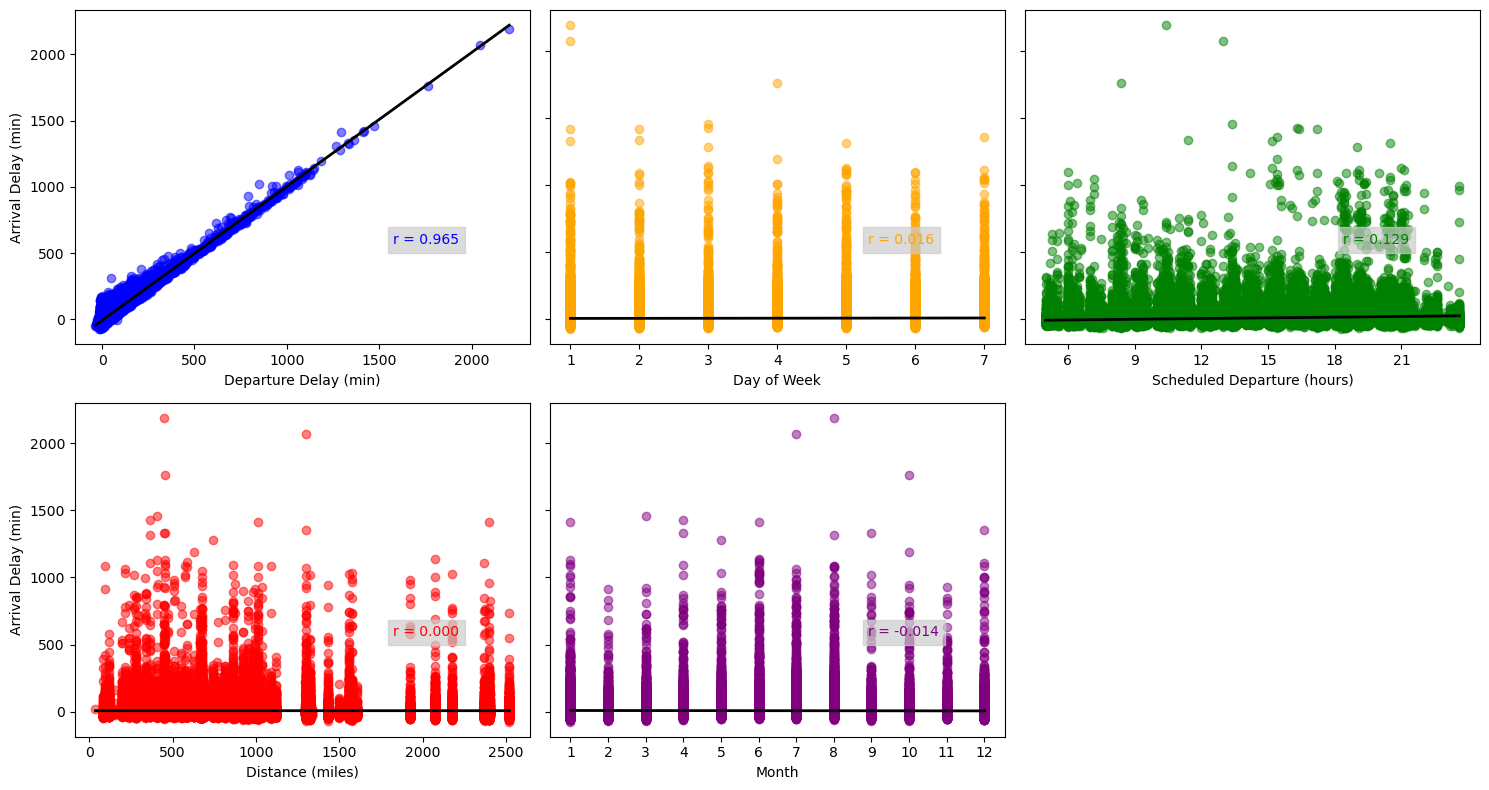

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), tight_layout=True)
axs = axs.flatten()

ivs = [dep_delay, day, sched_hours, dist, month]
colors = ['b', 'orange', 'g', 'r', 'purple']

for i, (ax, x, c) in enumerate(zip(axs[:5], ivs, colors)):
    ax.scatter(x, arr_delay, alpha=0.5, color=c)
    plot_regression_line(ax, x, arr_delay, color='k', ls='-', lw=2)
    r = corrcoeff(x, arr_delay)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, 
            bbox=dict(color='0.8', alpha=0.7))

xlabels = ['Departure Delay (min)', 'Day of Week', 'Scheduled Departure (hours)', 
           'Distance (miles)', 'Month']
[ax.set_xlabel(s) for ax, s in zip(axs[:5], xlabels)]

axs[2].set_xticks([6, 9, 12, 15, 18, 21])
axs[1].set_xticks([1, 2, 3, 4, 5, 6, 7])
axs[4].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

axs[0].set_ylabel('Arrival Delay (min)')
axs[3].set_ylabel('Arrival Delay (min)')
[ax.set_yticklabels([]) for ax in [axs[1], axs[2], axs[4]]]

# Hide the 6th subplot
axs[5].axis('off')

plt.show()

The correlation coefficients reveal the following relationships between arrival delay and the independent variables:

- **Departure Delay** (top-left panel): Very strong positive correlation (r = 0.965), indicating that departure delays are highly predictive of arrival delays. This makes intuitive sense as flights that leave late tend to arrive late. The tight linear pattern shows this is the dominant predictor of arrival delay.

- **Day of Week** (top-middle panel): Very weak negative correlation (r = -0.016), indicating virtually no linear relationship between the day of the week and arrival delay. The vertical striping pattern shows delays are distributed similarly across all days.

- **Scheduled Departure Time** (top-right panel): Weak positive correlation (r = 0.129), suggesting a minimal linear relationship between the time of day a flight is scheduled and its arrival delay. The scattered pattern shows no clear trend, though there appears to be slightly higher variability in delays for flights throughout the day.

- **Distance** (bottom-left panel): Zero correlation (r = 0.000), indicating no linear relationship between flight distance and arrival delay. The horizontal regression line confirms that distance is not a useful predictor of delays.

- **Month** (bottom-right panel): Very weak negative correlation (r = -0.014), indicating virtually no linear relationship between the month of the year and arrival delay. Delays are distributed similarly across all months.

Overall, departure delay is by far the strongest predictor of arrival delay, while day of week, scheduled time, distance, and month show negligible correlations and no clear linear patterns.

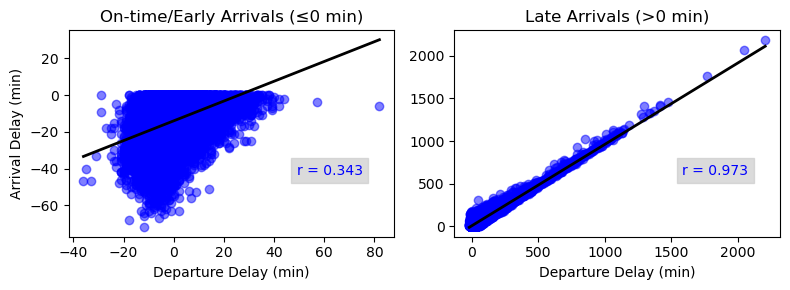

In [11]:
# Split data into low delay (<=0, on-time or early) and high delay (>0, late) groups
i_low = arr_delay <= 0
i_high = arr_delay > 0

fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

for ax, i in zip(axs, [i_low, i_high]):
    ax.scatter(dep_delay[i], arr_delay[i], alpha=0.5, color='b')
    plot_regression_line(ax, dep_delay[i], arr_delay[i], color='k', ls='-', lw=2)
    r = corrcoeff(dep_delay[i], arr_delay[i])
    ax.text(0.7, 0.3, f'r = {r:.3f}', color='b', transform=ax.transAxes, 
            bbox=dict(color='0.8', alpha=0.7))

[ax.set_xlabel('Departure Delay (min)') for ax in axs]
axs[0].set_title('On-time/Early Arrivals (≤0 min)')
axs[0].set_ylabel('Arrival Delay (min)')
axs[1].set_title('Late Arrivals (>0 min)')
plt.show()

The correlation coefficients reveal interesting differences between the two groups:

- **On-time/Early Arrivals** (left panel): Moderate positive correlation (r = 0.343), showing that even among flights that arrive early or on-time, departure delays are associated with less-early arrivals. The relationship is weaker and more scattered than the overall pattern, suggesting other factors help these flights make up time.

- **Late Arrivals** (right panel): Very strong positive correlation (r = 0.973), showing an extremely tight relationship between departure and arrival delays for flights that arrive late. This indicates that once a flight is delayed at departure, the delay typically persists or even compounds by arrival, with little ability to recover time in the air.

The main insight is that the departure-arrival delay relationship is much stronger for late flights (r = 0.973) than for on-time/early flights (r = 0.343). This suggests that while flights can sometimes make up small departure delays to arrive on-time or early, larger departure delays almost inevitably result in late arrivals with a nearly 1:1 correspondence.

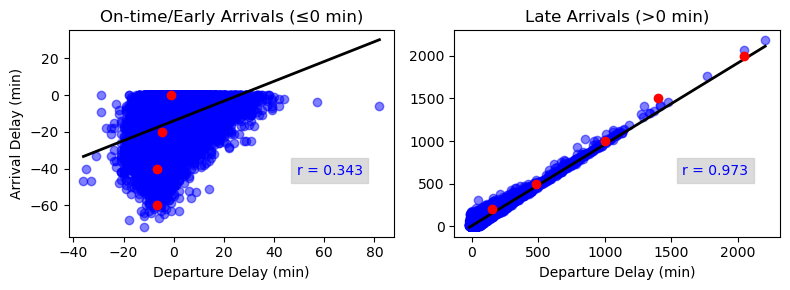

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

for ax, i in zip(axs, [i_low, i_high]):
    ax.scatter(dep_delay[i], arr_delay[i], alpha=0.5, color='b')
    plot_regression_line(ax, dep_delay[i], arr_delay[i], color='k', ls='-', lw=2)
    r = corrcoeff(dep_delay[i], arr_delay[i])
    ax.text(0.7, 0.3, f'r = {r:.3f}', color='b', transform=ax.transAxes, 
            bbox=dict(color='0.8', alpha=0.7))

# Plot mean departure delay for different arrival delay bins in the left panel
delay_bins_low = [-60, -40, -20, 0]  # bins for early arrivals
[axs[0].plot(dep_delay[(arr_delay >= b-10) & (arr_delay < b+10) & i_low].mean(), b, 'ro') 
 for b in delay_bins_low]

# Plot mean departure delay for different arrival delay bins in the right panel
delay_bins_high = [200, 500, 1000, 1500, 2000]  # bins for late arrivals
[axs[1].plot(dep_delay[(arr_delay >= b-100) & (arr_delay < b+100) & i_high].mean(), b, 'ro') 
 for b in delay_bins_high]

[ax.set_xlabel('Departure Delay (min)') for ax in axs]
axs[0].set_title('On-time/Early Arrivals (≤0 min)')
axs[0].set_ylabel('Arrival Delay (min)')
axs[1].set_title('Late Arrivals (>0 min)')
plt.show()

These analyses reveal different patterns in the two groups:

- In the **on-time/early arrivals** group (left panel), the red dots representing mean departure delays show some deviation from the regression line. The relationship appears more scattered and less consistently linear, which explains the moderate correlation (r = 0.343). This suggests that for flights arriving early or on-time, the relationship between departure and arrival delays is more complex and influenced by other factors.

- In the **late arrivals** group (right panel), the red dots align very closely with the regression line across all delay magnitudes. This confirms the very strong linear relationship (r = 0.973) holds consistently from small delays to extreme delays exceeding 2000 minutes.

The contrast between the two panels suggests that while late flights show a predictable, nearly 1:1 correspondence between departure and arrival delays, flights that manage to arrive on-time or early have a more variable relationship, indicating they can sometimes recover from departure delays through various factors.

Let's now assemble all results into a single figure for reporting purposes:

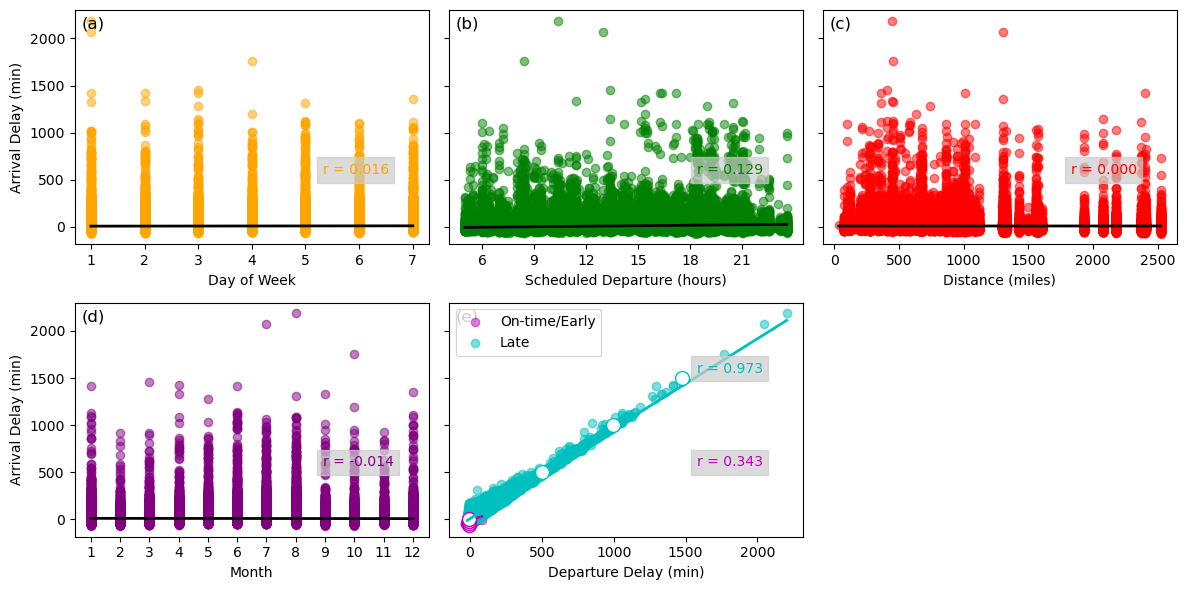

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [13]:
def plot_descriptive():
    
    fig, axs = plt.subplots(2, 3, figsize=(12, 6), tight_layout=True)
    axs = axs.flatten()
    
    ivs = [day, sched_hours, dist, month]
    colors = ['orange', 'g', 'r', 'purple']
    
    for ax, x, c in zip(axs[:4], ivs, colors):
        ax.scatter(x, arr_delay, alpha=0.5, color=c)
        plot_regression_line(ax, x, arr_delay, color='k', ls='-', lw=2)
        r = corrcoeff(x, arr_delay)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, 
                bbox=dict(color='0.8', alpha=0.7))

    xlabels = ['Day of Week', 'Scheduled Departure (hours)', 'Distance (miles)', 'Month']
    [ax.set_xlabel(s) for ax, s in zip(axs[:4], xlabels)]
    axs[1].set_xticks([6, 9, 12, 15, 18, 21])
    axs[0].set_xticks([1, 2, 3, 4, 5, 6, 7])
    axs[3].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    [ax.set_ylabel('Arrival Delay (min)') for ax in [axs[0], axs[3]]]
    [ax.set_yticklabels([]) for ax in [axs[1], axs[2], axs[4], axs[5]]]


    ax = axs[4]
    i_low = arr_delay <= 0
    i_high = arr_delay > 0
    fcolors = 'm', 'c'
    labels = 'On-time/Early', 'Late'
    delay_bins = [[-60, -40, -20, 0], [500, 1000, 1500, 2000]]
    ylocs = 0.3, 0.7
    
    for i, c, s, bins, yloc in zip([i_low, i_high], fcolors, labels, delay_bins, ylocs):
        ax.scatter(dep_delay[i], arr_delay[i], alpha=0.5, color=c, label=s)
        plot_regression_line(ax, dep_delay[i], arr_delay[i], color=c, ls='-', lw=2)
        [ax.plot(dep_delay[(arr_delay >= b-50) & (arr_delay < b+50) & i].mean(), b, 
                 'o', color=c, mfc='w', ms=10) for b in bins if not np.isnan(dep_delay[(arr_delay >= b-50) & (arr_delay < b+50) & i].mean())]
        r = corrcoeff(dep_delay[i], arr_delay[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, 
                bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('Departure Delay (min)')
    
    # Hide the 6th subplot
    axs[5].axis('off')

    panel_labels = 'a', 'b', 'c', 'd', 'e'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes) 
     for ax, s in zip(axs[:5], panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()